In [48]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

### Shapefile

https://www.census.gov/geographies/mapping-files/time-series/geo/tiger-line-file.2019.html

In [2]:
# shapefile
gdf_group = gpd.read_file('../data/shape_block_group/tl_2019_36_bg.shp')
gdf_group.head()

,STATEFP,COUNTYFP,TRACTCE,BLKGRPCE,GEOID,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,36,015,010200,1,360150102001,Block Group 1,G5030,S,41906395,22057,+42.2623602,-076.8963844,"POLYGON ((-76.96544 42.26472, -76.96544 42.264..."
1,36,063,024303,2,360630243032,Block Group 2,G5030,S,34153627,0,+43.1926587,-078.7897012,"POLYGON ((-78.82575 43.20439, -78.82575 43.208..."
2,36,007,014301,2,360070143012,Block Group 2,G5030,S,4859207,978257,+42.1056684,-075.9854403,"POLYGON ((-76.01756 42.09848, -76.01749 42.098..."
3,36,081,025900,2,360810259002,Block Group 2,G5030,S,64620,0,+40.7464004,-073.9045386,"POLYGON ((-73.90642 40.74564, -73.90535 40.747..."
4,36,081,016600,2,360810166002,Block Group 2,G5030,S,91377,0,+40.6783653,-073.8192669,"POLYGON ((-73.82136 40.68050, -73.82044 40.680..."


In [5]:
len(gdf_group)

15463

In [8]:
gdf_group['GEOID'] = gdf_group['GEOID'].astype('int')

In [9]:
gdf_group.dtypes

STATEFP       object
COUNTYFP      object
TRACTCE       object
BLKGRPCE      object
GEOID          int64
NAMELSAD      object
MTFCC         object
FUNCSTAT      object
ALAND          int64
AWATER         int64
INTPTLAT      object
INTPTLON      object
geometry    geometry
dtype: object

### Census Data

In [27]:
df_pop_raw = pd.read_csv('../data/population.csv')
df_pop_raw.head()

,GEOID,NAME,Total Population,Working Population,Essential Worker Population
0,360610001001,"Block Group 1, Census Tract 1, New York County...",0,0,0
1,360610002010,"Block Group 0, Census Tract 2.01, New York Cou...",0,0,0
2,360610002011,"Block Group 1, Census Tract 2.01, New York Cou...",637,313,74
3,360610002012,"Block Group 2, Census Tract 2.01, New York Cou...",2113,750,309
4,360610002020,"Block Group 0, Census Tract 2.02, New York Cou...",0,0,0


In [28]:
df_tmp = df_pop_raw['NAME'].str.split(',', expand=True).rename(columns={0: 'Block Group', 1: 'Census Tract', 2: 'County', 3: 'State'})
df_tmp.head()

,Block Group,Census Tract,County,State
0,Block Group 1,Census Tract 1,New York County,New York
1,Block Group 0,Census Tract 2.01,New York County,New York
2,Block Group 1,Census Tract 2.01,New York County,New York
3,Block Group 2,Census Tract 2.01,New York County,New York
4,Block Group 0,Census Tract 2.02,New York County,New York


In [29]:
df_pop = pd.concat([df_pop_raw, df_tmp], axis=1).drop('NAME', axis=1)
df_pop.head()

,GEOID,Total Population,Working Population,Essential Worker Population,Block Group,Census Tract,County,State
0,360610001001,0,0,0,Block Group 1,Census Tract 1,New York County,New York
1,360610002010,0,0,0,Block Group 0,Census Tract 2.01,New York County,New York
2,360610002011,637,313,74,Block Group 1,Census Tract 2.01,New York County,New York
3,360610002012,2113,750,309,Block Group 2,Census Tract 2.01,New York County,New York
4,360610002020,0,0,0,Block Group 0,Census Tract 2.02,New York County,New York


In [30]:
df_pop['GEOID'] = df_pop['GEOID'].astype('int')
df_pop.dtypes

GEOID                           int64
Total Population                int64
Working Population              int64
Essential Worker Population     int64
Block Group                    object
Census Tract                   object
County                         object
State                          object
dtype: object

### Merge

In [33]:
gdf_pop = gdf_group.merge(df_pop, left_on='GEOID', right_on='GEOID', how='inner')

In [35]:
len(gdf_pop)

6493

In [36]:
len(df_pop)

6493

In [37]:
gdf_pop['Total Population'].sum()

8419316

In [49]:
gdf_pop['Working Population'].sum()

4083215

In [50]:
gdf_pop['Essential Worker Population'].sum()

1682122

<AxesSubplot:>

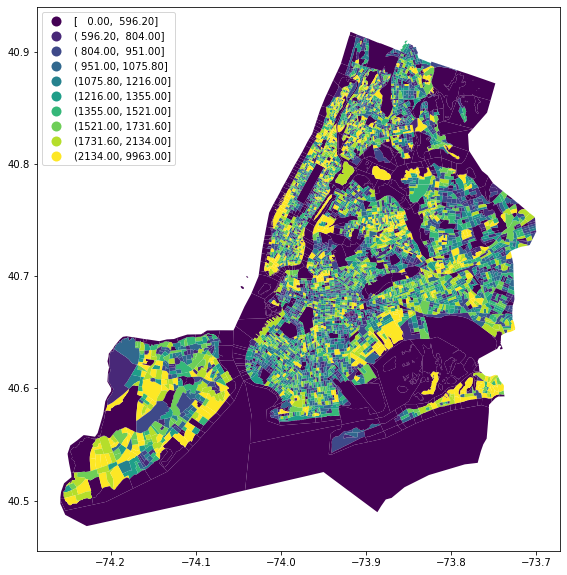

In [41]:
fig, ax = plt.subplots(1, figsize=(10,10))

gdf_pop.plot(ax=ax, column='Total Population', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

Text(0.5, 1.0, 'Essential Worker Population')

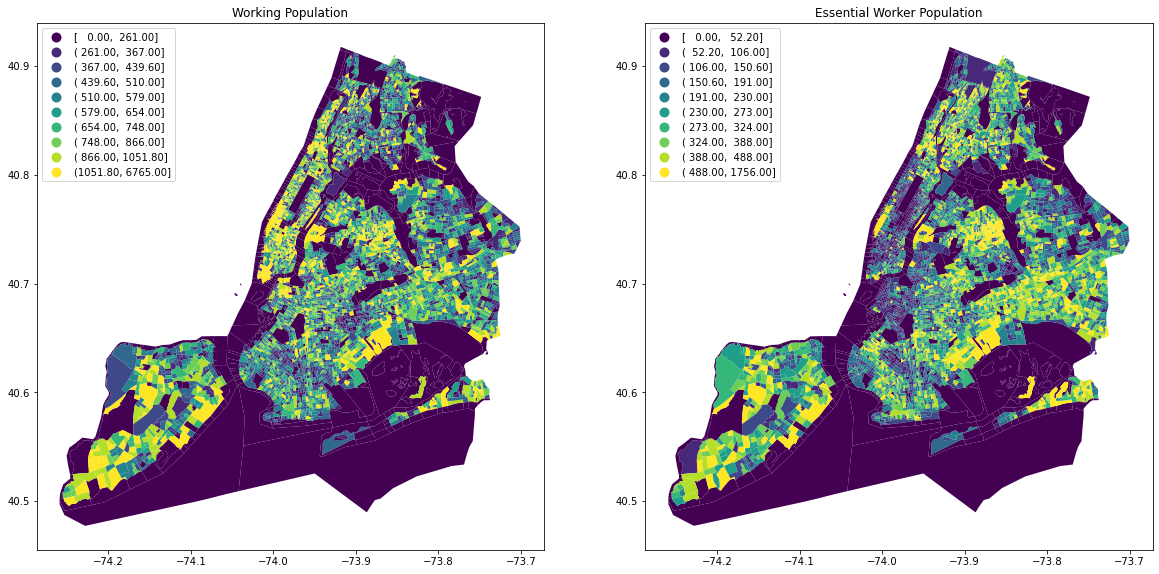

In [47]:
fig, axes = plt.subplots(1, 2, figsize=(20,10))

gdf_pop.plot(ax=axes[0], column='Working Population', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

gdf_pop.plot(ax=axes[1], column='Essential Worker Population', k=10, scheme='Quantiles', legend=True, 
              legend_kwds={'loc': 'upper left'})

axes[0].set_title('Working Population')
axes[1].set_title('Essential Worker Population')

In [43]:
gdf_pop.to_file('../results/block_group_population/block_group_population.shp')

DriverIOError: Failed to create file ../results/block_group_population/block_group_population.shp: No such file or directory